# Урок 1. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [1]:
from sklearn.metrics import precision_score, f1_score

In [22]:
### YOUR CODE HERE ###
import pandas as pd

titanic = pd.read_csv('titanic/train.csv')

# Заполняем пропущенные значения возраста
sex_median = titanic.groupby('Sex')['Age'].median()
print(f"Медианы возрастов от пола:\nмужчины - {sex_median['male']}, женщины - {sex_median['female']}")
titanic.loc[(titanic.Sex=='male') & (titanic['Age'].isna()), 'Age'] = sex_median['male']
titanic.loc[(titanic.Sex=='female') & (titanic['Age'].isna()), 'Age'] = sex_median['female']

# Заполняем пропущенные значения номеров кают и портов посадки
titanic.loc[titanic['Cabin'].isna(), 'Cabin'] = 'U'
titanic.loc[titanic['Embarked'].isna(), 'Embarked'] = 'U'

titanic_age_6_20 = titanic[(titanic['PassengerId'] >= 6) & (titanic['PassengerId'] <= 20)]['Age']
print(f'Возраст людей с ID от 6 до 20 включительно: \n{titanic_age_6_20.values}')
print('Количество пропущенных значений:', titanic_age_6_20.isnull().sum() )

# Заменяю категориальные строковые данные числовыми
titanic['Sex'].replace({'male':0, 'female':1}, inplace=True)
titanic['Embarked'].replace({'U':0, 'S':1, 'C':2, 'Q':3}, inplace=True)

# Делаю поле индексным
titanic.set_index('PassengerId', inplace=True)

# Удаляю не нужные для дальнейшего анализа столбцы
titanic.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

titanic.head()

Медианы возрастов от пола:
мужчины - 29.0, женщины - 27.0
Возраст людей с ID от 6 до 20 включительно: 
[29. 54.  2. 27. 14.  4. 58. 20. 39. 14. 55.  2. 29. 31. 27.]
Количество пропущенных значений: 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.9250,1
4,1,1,1,35.0,1,0,53.1000,1
5,0,3,0,35.0,0,0,8.0500,1


In [62]:
# разбиваю данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], titanic['Survived'], 
    random_state=17)

In [63]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
kn_pred = kn.predict(x_test)
kn_cm = confusion_matrix(y_test, kn_pred)
kn_rs = recall_score(y_test, kn_pred)
kn_ps = precision_score(y_test, kn_pred)
print('Используется метод "K ближайших соседей", получена матрица ошибок:\n', kn_cm)
print(f'Полнота: {kn_rs}, точность: {kn_ps}')

Используется метод "K ближайших соседей", получена матрица ошибок:
 [[110  21]
 [ 47  45]]
Полнота: 0.4891304347826087, точность: 0.6818181818181818


In [64]:
# Рассчитаем F1 score самостоятельно
f1_mera_manual = 2*kn_rs*kn_ps/(kn_rs+kn_ps)
print('Расчетная F1 мера:', f1_mera_manual)

Расчетная F1 мера: 0.5696202531645569


In [65]:
# теперь возьмем библиотечную функцию
f1_score(y_test, kn_pred)

0.5696202531645569

Как мы видим, рассчитанная нами самостоятельно метрика, и полученная с помощью библиотечной функции, совпадают

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [42]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [43]:
### YOUR CODE HERE ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
# К ближайших соседей
kn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
kn_pred = kn.predict(x_test)
print('Метод "К ближайших соседей"')
print(classification_report(y_test, kn_pred))
print(precision_recall_fscore_support(y_test, kn_pred))

# Наивный байес
gnb = GaussianNB().fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
print('\n\nМетод "Наивный байес"')
print(classification_report(y_test, gnb_pred))
print(precision_recall_fscore_support(y_test, gnb_pred))

# Деревья принятия решений
dtc = DecisionTreeClassifier(random_state=17).fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)
print('\n\nМетод "Деревья принятия решений"')
print(classification_report(y_test, dtc_pred))
print(precision_recall_fscore_support(y_test, dtc_pred))

# Логистическая регрессия
lr = LogisticRegression(random_state=17).fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print('\n\nМетод "Логистическая регрессия"')
print(classification_report(y_test, lr_pred))
print(precision_recall_fscore_support(y_test, lr_pred))

Метод "К ближайших соседей"
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223

(array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))


Метод "Наивный байес"
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))


Метод "Деревья принятия реше

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [56]:
### YOUR CODE HERE ###

skf = StratifiedKFold(n_splits=5, random_state=17)
skf.get_n_splits(x_train, y_train)
print(skf)
lgs = np.logspace(-1, 2, 500)

StratifiedKFold(n_splits=5, random_state=17, shuffle=False)


C:\Users\ddmit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [59]:
lrcv = LogisticRegressionCV(Cs=lgs, cv=skf, scoring='roc_auc')
lrcv.fit(x_train, y_train)

C:\Users\ddmit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ddmit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegressionCV(Cs=array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.149399...
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     

In [60]:
lrcv.scores_

{1: array([[0.81107143, 0.81083333, 0.81107143, ..., 0.80916667, 0.80916667,
         0.80916667],
        [0.87369048, 0.87416667, 0.87416667, ..., 0.8772619 , 0.8772619 ,
         0.8772619 ],
        [0.82904762, 0.82904762, 0.82904762, ..., 0.8402381 , 0.8402381 ,
         0.8402381 ],
        [0.88385542, 0.88409639, 0.88409639, ..., 0.88843373, 0.88843373,
         0.88843373],
        [0.83771084, 0.83746988, 0.83746988, ..., 0.83120482, 0.83120482,
         0.83120482]])}

In [61]:
lrcv.C_

array([0.63037532])

In [ ]:
# Размер шага графика

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [74]:
import matplotlib.pyplot as plt

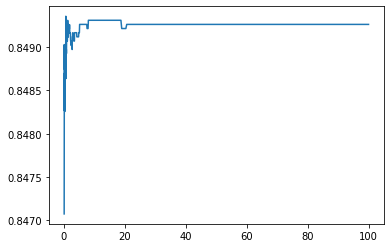

In [81]:
### YOUR CODE HERE ###
def get_mean_score(n):
    return lrcv.scores_[1][:, n].mean()

plt.plot(lgs, [get_mean_score(y) for y in range(0, len(lgs))]);

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [84]:
### YOUR CODE HERE ###
print('Лучшее значение:', lrcv.C_)
delta=(2-(-1))/500
print('Расстояние между точками:', delta)

Лучшее значение: [0.63037532]
Расстояние между точками: 0.006


(0.5883753153071278, 0.6723753153071279)

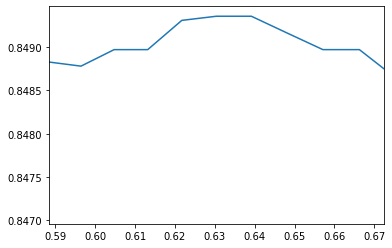

In [85]:
plt.plot(lgs, [get_mean_score(y) for y in range(0, len(lgs))])
plt.xlim(lrcv.C_[0]-delta*7, lrcv.C_[0]+delta*7)

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

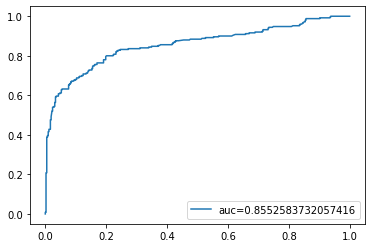

In [ ]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

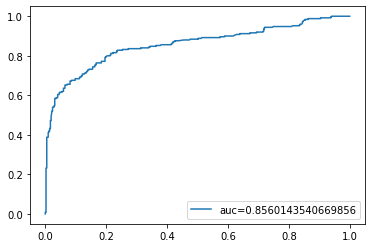

In [88]:
### YOUR CODE HERE ###
probas = lrcv.predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
